## Datatiedeprojekti: Case Tampereen asunnot

Asunnon hinnan määrittäminen on tyypillisesti haastavaa puuhaa, sillä siihen vaikuttavia tekijöitä on useita, eikä näiden väliset suhteet ole kovin selkeitä. Oikean hinnan löytäminen vaatii siis toimialatietämystä, mutta avuksi voidaan kokeilla tehdä ennustemalli. Tehtävän mallin datalähteeksi valikoitui asuntojen.hintatiedot.fi joka on ympäristöministeriön ylläpitämä sivu, jossa on tarjolla viimeisen 12kk myyntidata asunnoista, poislukien yksityishenkilöiden väliset kaupat. Hintadataa sivulle tuottaa usea välittäjä, kuten OP Koti ja Aktia. Hakutuloksissa otettiin huomioon vain Tamperelaiset asunnot.


[lähde](https://asuntojen.hintatiedot.fi/ohje/ohjeet.html) *Tuloslistassa yksittäisestä asuntokaupasta näytetään seuraavat tiedot:*  

| Sarake      | Kuvaus |
| ----------- | ----------- |
| Kaupunginosa      | Palvelussa näkyvät kaupunginosat ovat peräisin välittäjien aineistosta ja ne saattavat poiketa kaupunkien käyttämistä virallisista kaupunginosista       |
| Huoneisto   | Kuvaus asunnon huoneista, aputiloista ja varusteista (esim. 2h + k + kh + p)        |
| m2 | Asunnon pinta-ala  | 
|Vh€ |      Velaton hinta, joka sisältää asunnon myyntihinnan ja asuntoon kaupantekohetkellä mahdollisesti kohdistuvan yhtiövelan  |
|€/m2 |      Asunnon velaton neliöhinta  |
|Rak. vuosi |	    Rakennusvuosi, joka voi olla myös käyttöönottovuosi täysin peruskorjatuissa taloissa.  |
|Kerros 	  |      Kerrostaloissa asunnon kerrosluku ja talon kerrosten lukumäärä. Rivi- ja omakotitaloissa talon kerrosten lukumäärä  |
|Hissi 	    |    Kerrostalojen hissitieto  |
|Kunto 	    |    Kiinteistönvälittäjän tai asunnon omistajan arvio asunnon kunnosta  |
|Tontti 	|        Tontin hallintamuoto on joko Oma tai vuokratontti  |
|Energialuokka |	Rakennuksen energiatehokkuuden ilmaistaan energialuokka-asteikolla A – G. Kirjaimen perässä oleva vuosiluku kertoo laatimishetkellä noudatetun lainsäädännön vuoden.  |

Projekti hyödyntää tavallisimpia paketteja kuten Pandas-kijastoa, html funktiot tarvitsevat muutaman lisäpaketin, joita välttämättä ei ole valmiina.   

In [ ]:
%pip install pandas
%pip install lxml
%pip install html5lib
%pip install matplotlib
%pip install scikit-learn
%pip install requests
%pip install bs4

## Datan hankinta

Toteuteaan aluksi PoC yhdellä sivulla:

In [ ]:
import pandas as pd

# URL sisältää hakuparametrin 'Tampere'
url = 'https://asuntojen.hintatiedot.fi/haku/?c=Tampere&cr=1&nc=122&h=1&amin=&amax=&renderType=renderTypeTable&search=1'

#haku kerää normaalisti kaikki html pöydät, mutta 'match' kutsulla voidaan spesifioida mitä pöydässä on luettava, tallentetaan ensimmmäinen ja ainoa pöytä
table = pd.read_html(url, match='Asunto­kaupat')[0]
table.head(8)


,Kaupunginosa ◄,Huoneisto,Talot. ◄,m2 ◄,Vh € ◄,€/m2 ◄,Rv ◄,Krs ◄,Hissi ◄,Kunto ◄,Tontti ◄,Energial. ◄
0,1,1,1,1,1,1,1,1,1,1,1,1
1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yksiöt,Yksiöt,Yksiöt,Yksiöt,Yksiöt,Yksiöt,Yksiöt,Yksiöt,Yksiöt,Yksiöt,Yksiöt,Yksiöt
3,Lentävänniemi,"1h, kk",kt,3650,83800,2296,1972,5/8,on,tyyd.,oma,C2018
4,Keskusta,"1h, kt",kt,3500,192000,5486,2024,7/7,on,hyvä,oma,F2013
5,Peltolammi,"1h, k, alk, kph...",kt,3600,78000,2167,1971,4/7,on,tyyd.,vuokra,F2013
6,Niemenranta,1h + kt+ alk,kt,3600,109000,3028,2017,2/4,on,hyvä,vuokra,C2013
7,Kaleva,"1h,kk,kph",kt,2100,90000,4286,1942,4/4,ei,NaN,oma,F2013


Toteutus vaikuttaa toimivalta ja data parsiutuu hyvin muutamia turhia rivejä lukuunottamata. Sivuja on hakuparametrit huomioiden tässä tapauksessa 23. Toteutetaan hieman manuaalisempi datan raavinta.

In [4]:
sivujen_määrä = 23
sivut = []

# i vastaa sivunumeroa, joka sijoitetaan osaksi GET pyyntöä
for i in range(1, sivujen_määrä + 1):
    url_body = f'https://asuntojen.hintatiedot.fi/haku/?c=Tampere&cr=2&t=3&l=0&z={i}&search=1&sf=0&so=a&renderType=renderTypeTable'
    sivut.append(pd.read_html(url_body, match='Asunto­kaupat')[0])

#yhdistetään pöydät dataframeksi
data = pd.concat(sivut, ignore_index=True)
data.tail()

,Kaupunginosa ◄,Huoneisto,Talot. ◄,m2 ◄,Vh € ◄,€/m2 ◄,Rv ◄,Krs ◄,Hissi ◄,Kunto ◄,Tontti ◄,Energial. ◄
1309,NaN,4h+k+pesuh.+s+3xwc,ok,9250,210000,2270,1949,-1/2,ei,hyvä,oma,E2018
1310,NaN,"4h,k,s",ok,10700,100000,935,1980,NaN,ei,NaN,vuokra,NaN
1311,NaN,5h+k+khh+pukuh....,ok,16200,564000,3481,2014,1/2,ei,hyvä,oma,A2007
1312,23,23,23,23,23,23,23,23,23,23,23,23
1313,NaN,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Datan puhdistus

Kuten yllä nähtiin, datasetti vaikuttaa olevan siivoilun tarpeessa, mutta turhat rivit on ilmeisen helppo tunnistaa ja siten myös hävittää.

In [5]:
# nimetään sarakkeet uudelleen helpompaan muotoon
data.columns = ['Kaupunginosa', 'Huoneisto', 'TaloTyyppi', 'm2', 'Vh(€)', 'Neliöhinta(€)', 'Rakennusvuosi', 'Kerros', 'Hissi', 'Kunto', 'Tontti', 'Energialuokka']

In [6]:
# pudotetaan turhat rivit pois joita esiintyy sivujen lopussa ja alussa

# Kokoluokan kategoria parsiutuu virheellisesti riviksi
data = data[ ~data['Kaupunginosa'].isin(['Yksiöt', 'Kaksiot','Kolmiot', 'Neljä huonetta tai enemmän']) ]

# sivun numero parsiutuu yhdeksi riviksi, kaupunginosien oikeat nimet eivät ole näin lyhyitä
data = data[data['Kaupunginosa'].str.len() > 2]

# sivujen alkuun sekä loppuun parsiutuu myös tyhjä rivi
data = data.dropna(subset=['Kaupunginosa'])

# neliömäärän desimaali on hävinnyt, korjataan tämä
data['m2'] = data['m2'].astype(float) / 100

# Uusitaan indeksi
data.reset_index(drop=True, inplace=True)

data.tail()

,Kaupunginosa,Huoneisto,TaloTyyppi,m2,Vh(€),Neliöhinta(€),Rakennusvuosi,Kerros,Hissi,Kunto,Tontti,Energialuokka
1139,Ikuri,4h+k+kph+s+vh,rt,83.0,189000,2277,1973,NaN,ei,NaN,oma,D2018
1140,Lentävänniemi,5h+k+s,rt,147.0,330000,2245,1979,1/1,ei,hyvä,oma,C2018
1141,Holvasti,"Oh, 3x mh, k, r...",ok,104.0,235000,2260,1967,-1/1,ei,hyvä,oma,B2018
1142,Kaukajärvi,6h+k+s,rt,161.5,320000,1981,1999,1/2,ei,hyvä,oma,D2013
1143,Kaarila,"4(-5)h,k,2kph,2...",rt,110.0,295000,2682,2003,1/2,ei,hyvä,oma,E2018


In [ ]:
# otetaan tässä kohtaa data 'pysyvämpään' talteen siltä varalta, jos sivustolle käy jotain tulevaisuudessa.
data.to_csv('myyntihinnat_TRE_new.csv')

In [7]:
# tarkastellaan datan mahdollisia tarkempia korjaustarpeita
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Kaupunginosa   1144 non-null   object 
 1   Huoneisto      1143 non-null   object 
 2   TaloTyyppi     1144 non-null   object 
 3   m2             1144 non-null   float64
 4   Vh(€)          1144 non-null   object 
 5   Neliöhinta(€)  1144 non-null   object 
 6   Rakennusvuosi  1144 non-null   object 
 7   Kerros         1103 non-null   object 
 8   Hissi          1144 non-null   object 
 9   Kunto          874 non-null    object 
 10  Tontti         1108 non-null   object 
 11  Energialuokka  1019 non-null   object 
dtypes: float64(1), object(11)
memory usage: 107.4+ KB


## Puuttuvien arvojen paikkaus

Jatkuvuuden takia on eritelty 'original' sekä 'new' csv-tiedosto, data voi muuttua sivulla, joka voi tuoda odottomattomia muutoksia rakenteeseen ja näin ei menetetä vahingossa alkuperäistä dataa mikä saattaa poistua tulevaisuudessa.

In [107]:
import pandas as pd
data = pd.read_csv('myyntihinnat_TRE_original.csv', index_col=0)

In [108]:
# asetetaan numeraaliset datatyypit kuntoon

data['Vh(€)'] = data['Vh(€)'].astype(int)
data['Neliöhinta(€)'] = data['Neliöhinta(€)'].astype(int)
data['Rakennusvuosi'] = data['Rakennusvuosi'].astype(int)

In [109]:
# asetetaan puuttuvat tonttiarvot sen mukaan mikä on kaupunginosan yleisin tonttiomistamismuoto; 
# kaupunki luultavaasti myy / vuokraa tiettyjä alueita suuremmalla mittakaavalla eikä niinkään "kaistale"kohtaisesti
kategoria = data.groupby('Kaupunginosa', observed=True)

data['Tontti'] = kategoria['Tontti'].transform( lambda x: x.fillna(x.mode()[0]) )

Kunto on melko ympäripyöreä mittari tässä tapauksessa, sillä lähes koko datasetti on joko tyydyttävä tai hyvä kuntoluokitukseltaan, kuten alla nähdään. Oletetaan että 2000 luvun talot ovat vielä hyväkuntoisia eli niihin ei ole tarvetta tehdä lähitulevaisuudessa remonttia. Muutoin kunto on tyydyttävä

In [110]:
print(data['Kunto'].unique())

#kaikki huonokuntoiset talot
data.loc[data['Kunto'].isin(['huono'])]

['tyyd.' 'hyvä' nan 'huono']


,Kaupunginosa,Huoneisto,TaloTyyppi,m2,Vh(€),Neliöhinta(€),Rakennusvuosi,Kerros,Hissi,Kunto,Tontti,Energialuokka
30,Hervanta,"1h,+k",kt,31.5,59000,1873,1976,3/7,on,huono,oma,D2018
46,Hervanta,1h+alkovi+kk+kp...,kt,31.5,55000,1746,1974,1/8,on,huono,oma,E2018
179,Peltolammi,2h+k+kh+parv. (...,kt,56.5,71000,1257,1972,1/7,on,huono,vuokra,F2013
285,Rautaharkko,"2h, k, kph, vh, p",kt,53.0,74000,1396,1969,3/3,ei,huono,vuokra,F2013
437,Kaukajärvi,2h+k,kt,56.0,77000,1375,1974,1/3,ei,huono,oma,F2013
654,Atala,3h+k+s,rt,80.0,172000,2150,1989,1/1,ei,huono,oma,D2013
766,Juhannuskylä,"3h,k,kph",kt,75.0,310000,4133,1910,NaN,on,huono,oma,NaN
802,Tammela,"3 h, k, kh, p",kt,72.5,160000,2207,1980,2/6,on,huono,oma,F2013
944,Härmälä,"4 h, k, ph/wc +...",ok,93.0,96000,1032,1937,2/2,ei,huono,vuokra,NaN
1133,Vehmainen,"4h, k, wc, kph/...",ok,157.5,200000,1270,1972,NaN,ei,huono,oma,E2018


In [111]:
import numpy as np

# asetetaan kunto puuttuville riveille rakennusvuoden mukaan
data['Kunto'] = np.where(
    (data['Kunto'].isna()) & (data['Rakennusvuosi'] >= 2000),
    'hyvä',
    data['Kunto']
)

data['Kunto'] = np.where(
    (data['Kunto'].isna()) & (data['Rakennusvuosi'] < 2000),
    'tyyd.',
    data['Kunto']
)

## Ääriarvojen käsittely

Tarkastellaan visuaalisella keinolla mahdollisia suuria yksittäisiä poikkeamia datan numeraalisissa arvoissa

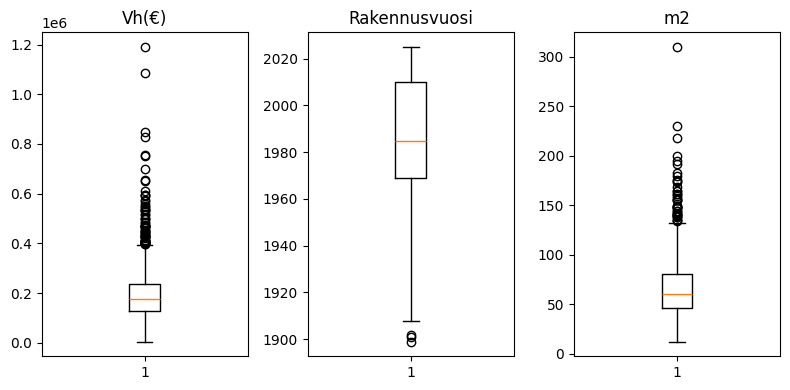

In [112]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(1, 3, figsize = (8,4))

axes[0].boxplot(data[['Vh(€)']])
axes[0].set_title('Vh(€)')

axes[1].boxplot(data[['Rakennusvuosi']])
axes[1].set_title('Rakennusvuosi')

axes[2].boxplot(data[['m2']])
axes[2].set_title('m2')

plt.tight_layout()
plt.show()

Havaitaan yhteensä 7 selkeästi poikkeavaa pistettä hinnan ja neliömäärän yläpäässä, nämä tulevat luultavasti hankaloittamaan mallin kouluttamista joten poistetaan nämä.

In [113]:
data = data[ data['Vh(€)'] < 800000 ]
data = data[ data['m2'] < 210 ]

Rakennusvuoden tapauksessa löydetään muutamia todella vanhoja asuntoja jotka ovat kuitenkin säilyttäneet arvonsa sekä kuntonsa. Lisäksi vanhat asunnot keskittyvät keskustan alueelle joten näitä ei välttämättä ole suotavaa poistaa. Harkitaan datan normalisointia mikäli mallin suorituskyky yskii

In [114]:
data[ data['Rakennusvuosi'] < 1910 ]

,Kaupunginosa,Huoneisto,TaloTyyppi,m2,Vh(€),Neliöhinta(€),Rakennusvuosi,Kerros,Hissi,Kunto,Tontti,Energialuokka
152,Hämeenpuisto,"1h,avok,kph,s",kt,32.0,135000,4219,1908,2/3,ei,hyvä,oma,G2013
287,Lapinniemi,1h+k+kph+s+eril...,kt,67.0,330000,4925,1899,4/6,on,hyvä,oma,NaN
718,Keskusta,"3h, k, halli, ...",kt,103.5,375000,3623,1901,4/5,on,tyyd.,oma,G2013
1051,Tammerkoski,6h+k+kph+erilli...,kt,192.0,500000,2604,1902,2/4,on,tyyd.,oma,F2013


Tarkastellaan vielä setin 'yleisilmettä' describe() metodilla

In [115]:
data.describe()

,m2,Vh(€),Neliöhinta(€),Rakennusvuosi
count,1137.000000,1137.000000,1137.000000,1137.000000
mean,66.073263,195036.216359,3099.075638,1986.089710
std,28.525922,101468.230960,1221.398062,25.148167
min,12.500000,5040.000000,360.000000,1899.000000
25%,46.000000,126000.000000,2231.000000,1969.000000
50%,61.000000,175000.000000,3000.000000,1985.000000
75%,80.000000,235000.000000,3793.000000,2010.000000
max,200.000000,757545.000000,8992.000000,2025.000000


Havaitaan poikkeuksellisen halpa neliöhinta, tutkitaan tätä tarkemmin.

In [116]:
data[data['Neliöhinta(€)'] < 800 ]

,Kaupunginosa,Huoneisto,TaloTyyppi,m2,Vh(€),Neliöhinta(€),Rakennusvuosi,Kerros,Hissi,Kunto,Tontti,Energialuokka
6,Polso,"1h, kk",kt,26.5,20000,755,1975,1/2,ei,tyyd.,vuokra,D2018
65,Hervantajärvi,Tolppa,kt,14.0,5040,360,2024,1/1,on,hyvä,vuokra,A2018
100,Hervantajärvi,katos,kt,12.5,8500,680,2024,1/1,on,hyvä,vuokra,A2018
258,Keskusta,2 h+kk+kph+parveke,kt,50.0,38000,760,1977,1/3,ei,tyyd.,oma,NaN
621,Ikuri,"3, k, kph, vh, ...",kt,76.0,58000,763,1981,2/3,ei,hyvä,vuokra,E2013


Huomataan että 2 kohdetta eivät ole asuntoja vaan tolppapaikka sekä autokatospaikka, lisäksi on epärealistista että keskustassa oleva asunto olisi yhtä kallis neliöhinnaltaan kuin Polsossa oleva, mikäli talon speksit ovat oikeasti kuvatun kaltaiset. Periaatteessa mahdollista että ilmoitettu velaton hinta tai muu vastaava poikkeama normaalista tavasta.

In [117]:
# poistetaan epäkohdat
data = data[ ~data['Huoneisto'].isin(['Tolppa', 'katos']) ]
data = data.drop(258)

## Feature engineering

Kerros voitaisiin ymmärtää luokkana mutta talon absoluuttisella kerroslukumäärällä ei ole niin suurta merkitystä verrattuna siihen, onko asunto ylimmässä kerroksessa (esim 5/5 = 1), tai vaihtoehtosesti kuinka lähellä ylintä kerrosta se on [lähde](https://vuokranantajat.fi/lehdet/pienta-pintaremonttia-vai-kaikki-uusiksi/). Kerros muuttujaa voidaan siis kuvata järkevästi kerrosten muodostamana murtolukuna, missä ainakin hypotettisesti 1 olisi tavoiteltavin arvo ja nyt se on vertailukelpoisempi eri korkuisten talojen kanssa.

In [118]:
# todettu testauksessa tämä ominaisuus turhaksi, pidetään pohja tallessa
'''
#täydennetään puuttuvat kerrokset keskiarvolla, jotta tyyppimuunnos toimii
kategoria = data.groupby('TaloTyyppi', observed=True)

data['Kerros'] = kategoria['Kerros'].transform( lambda x: x.fillna(x.mode()[0]) )

# kerros numeroksi
data['Kerros'] = data['Kerros'].apply(lambda x: float( eval(x) ))
'''

"\n#täydennetään puuttuvat kerrokset keskiarvolla, jotta tyyppimuunnos toimii\nkategoria = data.groupby('TaloTyyppi', observed=True)\n\ndata['Kerros'] = kategoria['Kerros'].transform( lambda x: x.fillna(x.mode()[0]) )\n\n# kerros numeroksi\ndata['Kerros'] = data['Kerros'].apply(lambda x: float( eval(x) ))\n"

Mikäli muutamme dataa numeraaliseen muotoon, on se luultavasti tehokkaamin hyödynnettävissä myöhemmin, jolloin tähän ei tarvitse palata. Pyritään siis muuttamaan hyödylliseksi nähtyjä ominaisuuksia numeraaliseksi

In [119]:
#hissi arvoiksi 0, 1
hissin_tila = {'on': 1, 'ei': 0}
data['Hissi'] = data['Hissi'].map(hissin_tila)

#tontin omistus arvoiksi 0, 1
tontti = {'oma': 1, 'vuokra': 0}
data['Tontti'] = data['Tontti'].map(tontti)

In [120]:
# muutetaan kuntoluokitus numeroksi
laatu = {'huono': 1, 'tyyd.': 2, 'hyvä': 3}
data['Kunto'] = data['Kunto'].map(laatu)

In [121]:
# Muutetaan kaupunginosa numeraaliseksi arvoksi, joka on alueen neliökeskihinta
keskiarvot = data.groupby('Kaupunginosa')['Neliöhinta(€)'].mean()

data['Kaupunginosa_neliöKeskihinta'] = data['Kaupunginosa'].map(keskiarvot)


Huoneisto voidaan koodata regexillä helposti numeroiksi:

In [122]:
# yleensä numeron perässä on 'h' mutta tässä on poikkeuksia joten käytetään mitä tahansa kirjainta
data['Huoneisto'] = data['Huoneisto'].replace({'1.': 1, '2.': 2, '3.': 3, '4.': 4, '5.': 5, '6.': 6}, regex=True)

print(data['Huoneisto'].unique())

[1 'tupakeittiö...' 'oh+tk+s' 'empty' 'tk, alk, kph/wc...' 'Tupak+kh+rp'
 'tupak+alk+p' 2 'Olohuone/keitti...' 'oh/avokeitti...'
 'Oh, mh, k, kph/...' 'SUPERHIENO KAKS...' 'oh, mh, kk, wc/...' 4 3
 'Putkiremontoitu...' 'Maalämp...' 5 6 'Liikehuoneisto' '8h,k,s' nan]


In [123]:
data = data[ data['Huoneisto'].isin([1, 2, 3, 4, 5, 6]) ]

## Datan mallinnus

In [124]:
import sklearn
import sklearn.model_selection

#otetaan aluksi selitettävä tekijä erilleen
X = data.drop('Vh(€)', axis=1)
y = data['Vh(€)']


#jaetaan data koulutus- ja testausosaan
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.15, random_state=42)


Testataan eri parametrikombinaatioiden suorituskykyä Random forest estimaattorilla

In [125]:
import sklearn.ensemble

X_train_1 = X_train[['Kaupunginosa_neliöKeskihinta', 'm2', 'Rakennusvuosi', 'Kunto']]
X_test_1 = X_test[['Kaupunginosa_neliöKeskihinta', 'm2', 'Rakennusvuosi', 'Kunto']]

X_train_2 = X_train[['Kaupunginosa_neliöKeskihinta', 'm2', 'Rakennusvuosi', 'Kunto', 'Hissi']]
X_test_2 = X_test[['Kaupunginosa_neliöKeskihinta', 'm2', 'Rakennusvuosi', 'Kunto', 'Hissi']]

X_train_3 = X_train[['Kaupunginosa_neliöKeskihinta', 'm2', 'Rakennusvuosi', 'Hissi', 'Tontti', 'Kunto']]
X_test_3 = X_test[['Kaupunginosa_neliöKeskihinta', 'm2', 'Rakennusvuosi', 'Hissi', 'Tontti', 'Kunto']]

X_train_4 = X_train[['Kaupunginosa_neliöKeskihinta', 'm2', 'Rakennusvuosi', 'Hissi', 'Tontti', 'Kunto', 'Huoneisto']]
X_test_4 = X_test[['Kaupunginosa_neliöKeskihinta', 'm2', 'Rakennusvuosi', 'Hissi', 'Tontti', 'Kunto', 'Huoneisto']]


rf_model = sklearn.ensemble.RandomForestRegressor(random_state=0, oob_score=True)

In [126]:
import sklearn.metrics

models = [[X_train_1, X_test_1], [X_train_2, X_test_2], [X_train_3, X_test_3], [X_train_4, X_test_4]]
count = 1

for i in models:

    rf_model.fit(i[0], y_train)
    y_pred = rf_model.predict(i[1])
    
    r2_score = sklearn.metrics.r2_score(y_test, y_pred)
    mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)

    
    print(f'MAE {count}: {mae}')
    print(f"OOB Score {count}: {rf_model.oob_score_}")
    print(f"R2 score {count}: {r2_score}")
    print()
    
    count += 1



MAE 1: 25662.219489843163
OOB Score 1: 0.8269870357100043
R2 score 1: 0.8615914048465263

MAE 2: 25134.51708635677
OOB Score 2: 0.8286212773598594
R2 score 2: 0.8648273704300785

MAE 3: 25119.42630276833
OOB Score 3: 0.8332658978452512
R2 score 3: 0.8650580609241516

MAE 4: 24815.96252437642
OOB Score 4: 0.8322131943935436
R2 score 4: 0.8644741249177824



Vaikuttaa siltä että OOB ja R2 antavat melko saman suuntaisia arvoja, joskin OOB on hieman konservatiivisempi. MAE on hyväksyttävällä tasolla. Malli 4 suorittaa parhaiten vaikka random_state arvoja tai jakomääriä muuttelisi. Määritetään seuraavaksi optimaalisemmat hyperparametrit Gridsearchin avulla

In [127]:
import sklearn.ensemble
import sklearn.model_selection


params = {
    'n_estimators': [200, 300, 500, 600, 700],
    'max_depth': [10, 20, 30, 40, None],
    'max_features': ['sqrt', None],
}
rf = sklearn.ensemble.RandomForestRegressor(random_state=0)

clf = sklearn.model_selection.GridSearchCV(rf, cv=3, param_grid=params,
        scoring='neg_mean_absolute_error')

clf.fit(X_train_4, y_train)

clf.best_estimator_

RandomForestRegressor(max_depth=10, max_features=None, n_estimators=700,
                      random_state=0)

In [129]:
rf_final = sklearn.ensemble.RandomForestRegressor(max_depth=10, max_features=None, n_estimators=700, random_state=0, oob_score=True)

rf_final.fit(X_train_4, y_train)

y_pred = rf_final.predict(X_test_4)
    
r2_score = sklearn.metrics.r2_score(y_test, y_pred)
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
    
print(f'MAE: {mae}')
print(f"OOB Score: {rf_final.oob_score_}")
print(f"R2 score: {r2_score}")

MAE: 24782.804419080174
OOB Score: 0.835351221363293
R2 score: 0.8696695673407792


## Myynti-ilmoitusten kauppahinnan ennustaminen

Yllä koulutettiin useita testimalleja joilla saatiin osviittaa suorituskyvystä kun käytettävät ominaisuudet vaihtelevat, otetaan nyt käyttöön yksi malli jonka koulutukseen käytetään kaikki kerätty data ja haetaan oikeita myynti-ilmoituksia arvioitavaksi. Itse hakua voi manipuloida haluamallaan tavalla, kunhan kohdekaupunkina on Tampere

In [40]:
import requests
from bs4 import BeautifulSoup

# haetaan maltilliset 5 sivua ilmoituksia
hakusivut_n = 5
l_list = []

for i in range(1, hakusivut_n +1):

    # URL, haku Tamperelaisille kerrostaloille valituilla spekseillä jotka voisivat kiinnostaa tekijää
    url = f'https://www.etuovi.com/myytavat-asunnot/tampere?haku=M2228989544&sivu={i}'
    response = requests.get(url)


    # Kerätään yksittäiseen ilmoitukseen ohjaavat linkit
    soup = BeautifulSoup(response.content, 'html.parser')

    for link in soup.find_all('a', {'class': "mui-style-1hvv1xy e3qdyeq2"}):
        href = link.get('href')
        full_url = 'https://www.etuovi.com' + href
        l_list.append(full_url)

len(l_list)

150

In [41]:
# Tämän osuuden voi skipata sillä materiaali löytyy kansiosta valmiiksi
'''
import time
import random

# luetaan myyntisivut tarkastelua varten
i = 1
for l in l_list:

    sale_site = requests.get(l)
    fname = f'hinta_data/kohde_{i}.html'
    i += 1
    
    with open(fname, 'wb') as f:
        f.write(sale_site.content)
    
    #vältetään mahdollinen CATHPA tai / ja palomuurin volyymi blokki odottamalla hetki
    time.sleep(1 + random.random() * 2)

'''   

"\nimport time\nimport random\n\n# luetaan myyntisivut tarkastelua varten\ni = 1\nfor l in l_list:\n\n    sale_site = requests.get(l)\n    fname = f'hinta_data/kohde_{i}.html'\n    i += 1\n    \n    with open(fname, 'wb') as f:\n        f.write(sale_site.content)\n    \n    #vältetään mahdollinen CATHPA tai / ja palomuurin volyymi blokki odottamalla hetki\n    time.sleep(1 + random.random() * 2)\n\n"

Kun html-data on tavalla tai toisella saatu kasaan, voidaan aloittaa varsinainen parsinta. Alustetaan aluksi dictionary valituilla ominaisuuksilla, joka myöhemmin muutetaan dataframeksi. 

In [130]:
import glob

test_data = dict()
columns = ['id', 'Kaupunginosa', 'Huoneisto', 'm2', 'Hinta_pyyntö', 'Rakennusvuosi', 'Tontti', 'Kunto', 'Hissi']

for c in columns:
    test_data[c] = list()

# haetaan kansiosta html tiedostot
indices = glob.glob('./hinta_data/*.html')
len(indices)

150

Varsinainen parsinta kerää talteen 9 eri ominaisuutta, parsinta on toteutettu tässä tapauksessa etuovi.com sivulla oleville kohteille joten esimerkiksi oikotien kohteita ei saada talteen ilman muutoksia.

In [131]:
from bs4 import BeautifulSoup

#käydään koko materiaali läpi ja kerätään testidata
for i in indices:

    with open(i, encoding='utf-8') as f:
            content = f.read()
    soup = BeautifulSoup(content, 'html.parser')

    # haetaan ilmoituksen uniikki id
    id = soup.find('title').text
    id = id.split(' ')[-1]
    test_data['id'].append(id)

    # haetaan huoneistoinfo
    try:
        type = soup.find_all('h2', {'class': 'Gunfiha'})[0].text
        test_data["Huoneisto"].append(type)
    except IndexError:
        test_data["Huoneisto"].append(None)

    # haetaan vuosi, hintapyynti ja m2
    page_content = soup.find_all('h3')

    try:
        vuosi = page_content[2].text
        test_data["Rakennusvuosi"].append(int(vuosi))
    except IndexError:
        test_data["Rakennusvuosi"].append(None)

    try:
        price = page_content[0].text
        price = price.split("\xa0")[0]
        test_data["Hinta_pyyntö"].append(int(price) * 1000)
    except IndexError:
        test_data["Hinta_pyyntö"].append(None)

    try:
        tila = page_content[1].text
        tila = tila.split(" ")[0].strip()
        tila = tila.replace(',', '.') # asetetaan oikea desimaalierotin
        test_data["m2"].append(float(tila))
    except IndexError:
        test_data["m2"].append(None)

    #Haetaan asuinalue
    try:
        alue = soup.find('h3', {'class': 'MuiTypography-root MuiTypography-h4 e1tdergc0 mui-style-1eu6cqb'}).text
        alue = alue.split(' ')[1].strip(',')
        test_data["Kaupunginosa"].append(alue)
    except AttributeError:
        test_data["Kaupunginosa"].append(None)

    #haetaan kunto, hissi sekä tontin omistus
    content = soup.find_all('div', {'class': 'MuiGrid-root MuiGrid-item MuiGrid-grid-xs-12 MuiGrid-grid-sm-8 lrqhKtM mui-style-w0n03t'})
    
    # koodataan arvot suoraan numeraaliseksi, 'välttävä' korvaa alkuperäisdatan kategorian 'huono'
    tontti_map = {'Oma': 1, 'Vuokra': 0}
    kunto_map = {'Hyvä': 3, 'Tyydyttävä': 2, 'Välttävä': 1}

    tontti_found = False
    kunto_found = False
    hissi_found = False

    #rivien määrä vaihtelee suuresti joten joudutaan tekemään 'hankalammin'
    for row in content:
        
        if row.text in tontti_map and not tontti_found:
            #print(row.text)
            test_data['Tontti'].append(tontti_map[row.text])
            tontti_found = True

        elif row.text in kunto_map and not kunto_found:
            #print(row.text)
            test_data['Kunto'].append(kunto_map[row.text])
            kunto_found = True
        
        elif 'hissi' in row.text and not hissi_found:
            test_data['Hissi'].append(1)
            hissi_found = True

    
    if not tontti_found:
        test_data['Tontti'].append(None)
    if not kunto_found:
        test_data['Kunto'].append(None)
    #satunnaisotannalla havaitaan että mikäli hissiä ei mainita ollenkaan, sitä ei ole
    if not hissi_found:
        test_data['Hissi'].append(0)

In [132]:
test_df = pd.DataFrame.from_dict(test_data)

# asetetaan myyntiilmoituksen id-numero indeksiksi
test_df.set_index('id', inplace=True)

# asetetaan keskineliöhinta koulutusdatan pohjalta
test_df['Kaupunginosa_neliöKeskihinta'] = test_df['Kaupunginosa'].map(keskiarvot)

# Pelkistetään huoneiden määräksi
test_df['Huoneisto'] = test_df['Huoneisto'].replace({'1.': 1, '2.': 2, '3.': 3, '4.': 4, '5.': 5, '6.': 6}, regex=True)
test_df = test_df[ test_df['Huoneisto'].isin([1, 2, 3, 4, 5, 6]) ]

test_df.head()

,Kaupunginosa,Huoneisto,m2,Hinta_pyyntö,Rakennusvuosi,Tontti,Kunto,Hissi,Kaupunginosa_neliöKeskihinta
id,,,,,,,,,
594294,Viinikka,2,58.0,123000.0,1949.0,0.0,NaN,0,2526.400000
x67628,Janka,2,47.0,129000.0,1991.0,0.0,3.0,1,2611.285714
20321050,Kaleva,1,32.0,139000.0,1965.0,0.0,3.0,1,3583.146341
20907527,Hervanta,2,59.5,115000.0,1976.0,1.0,3.0,1,2023.575758
31847146,Rantaperkiö,1,20.5,133000.0,2026.0,0.0,3.0,1,2785.625000


In [99]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 594294 to 21188625
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Kaupunginosa                  148 non-null    object 
 1   Huoneisto                     148 non-null    object 
 2   m2                            148 non-null    float64
 3   Hinta_pyyntö                  148 non-null    float64
 4   Rakennusvuosi                 148 non-null    float64
 5   Tontti                        148 non-null    float64
 6   Kunto                         131 non-null    float64
 7   Hissi                         148 non-null    int64  
 8   Kaupunginosa_neliöKeskihinta  144 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.6+ KB


Testiaineistoissa on pari riviä, jotka eivät ole tunnistettuja kaupunginalueita, poistetaan nämä rivit. 

In [133]:
test_df = test_df.dropna(subset='Kaupunginosa_neliöKeskihinta')

# asetetaan kunto puuttuville riveille rakennusvuoden mukaan
test_df['Kunto'] = np.where(
    (test_df['Kunto'].isna()) & (test_df['Rakennusvuosi'] >= 2000),
    3,
    test_df['Kunto']
)

test_df['Kunto'] = np.where(
    (test_df['Kunto'].isna()) & (test_df['Rakennusvuosi'] < 2000),
    2,
    test_df['Kunto']
)

150-ilmoituksen erästä vain 5 oli käyttökelvottomia, joka oli hyvä suhde. Koulutetaan seuraavaksi varsinainen malli ja haetaan ennusteita.

In [134]:
# koulutusdata ja mallin luominen
rf_model_live = sklearn.ensemble.RandomForestRegressor(max_depth=10, max_features=None, n_estimators=700, random_state=0, oob_score=True)

X_live = data[['Kaupunginosa_neliöKeskihinta', 'm2', 'Huoneisto', 'Rakennusvuosi', 'Tontti', 'Kunto', 'Hissi']]
rf_model_live.fit(X_live, y)

print(f"OOB Score final: {rf_model_live.oob_score_}")

OOB Score final: 0.8463054679658745


OOB arvo on jopa hieman korkeampi, kuin testimalleissa, mikä taas mahdollisesti indikoi hyvää suorituskykyä

In [135]:
X_live = test_df[['Kaupunginosa_neliöKeskihinta', 'm2', 'Huoneisto', 'Rakennusvuosi', 'Tontti', 'Kunto', 'Hissi']]

predictions = rf_model_live.predict(X_live)

test_df['Hinta_ennuste'] = predictions

test_df['Hinta_erotus'] = test_df['Hinta_pyyntö'] - test_df['Hinta_ennuste']

Pieni kurkistus tuloksiin:

In [136]:
test_df[['Hinta_pyyntö', 'Hinta_ennuste', 'Hinta_erotus']].head(20)

,Hinta_pyyntö,Hinta_ennuste,Hinta_erotus
id,,,
594294,123000.0,140897.119169,-17897.119169
x67628,129000.0,126757.705093,2242.294907
20321050,139000.0,127655.561398,11344.438602
20907527,115000.0,109495.825833,5504.174167
31847146,133000.0,114898.132503,18101.867497
67483682,139000.0,114898.132503,24101.867497
37713702,139000.0,124809.582171,14190.417829
63500262,139000.0,124809.582171,14190.417829
20375327,122000.0,133979.936554,-11979.936554


Tulokset voidaan lopuksi ottaa halutessa pysyvämpään talteen

In [50]:
#test_df.to_csv('hintaennusteet.csv')